In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sts

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

inspector = inspect(engine)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
measurement_column = inspector.get_columns('measurement')
for x in measurement_column:
    print(x['name'], x['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
station_column = inspector.get_columns('station')
for x in station_column:
    print(x['name'], x['type'])
    

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [21]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [23]:
#finding the last date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

'2017-08-23'

In [24]:
#12 months from last date 2016 is a leap year so adding a day
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=366)
print("Query Date: ", query_date)

Query Date:  2016-08-22


In [25]:
# Perform a query to retrieve the data and precipitation scores
scores = session.query(Measurement.station,Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).all()
scores

[('USC00519397', '2016-08-22', 0.4),
 ('USC00519397', '2016-08-23', 0.0),
 ('USC00519397', '2016-08-24', 0.08),
 ('USC00519397', '2016-08-25', 0.08),
 ('USC00519397', '2016-08-26', 0.0),
 ('USC00519397', '2016-08-27', 0.0),
 ('USC00519397', '2016-08-28', 0.01),
 ('USC00519397', '2016-08-29', 0.0),
 ('USC00519397', '2016-08-30', 0.0),
 ('USC00519397', '2016-08-31', 0.13),
 ('USC00519397', '2016-09-01', 0.0),
 ('USC00519397', '2016-09-02', 0.0),
 ('USC00519397', '2016-09-03', 0.0),
 ('USC00519397', '2016-09-04', 0.03),
 ('USC00519397', '2016-09-05', None),
 ('USC00519397', '2016-09-06', None),
 ('USC00519397', '2016-09-07', 0.05),
 ('USC00519397', '2016-09-08', 0.0),
 ('USC00519397', '2016-09-09', 0.03),
 ('USC00519397', '2016-09-10', 0.0),
 ('USC00519397', '2016-09-11', 0.05),
 ('USC00519397', '2016-09-12', 0.0),
 ('USC00519397', '2016-09-13', 0.02),
 ('USC00519397', '2016-09-14', 1.32),
 ('USC00519397', '2016-09-15', 0.42),
 ('USC00519397', '2016-09-16', 0.06),
 ('USC00519397', '2016-0

In [78]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
scores_df = pd.DataFrame(scores, columns=['station','date', 'precipitation'])
scores_df.set_index('date', inplace=True)
scores_df =scores_df.sort_values(by='date',ascending=True)
scores_df

,station,precipitation
date,,
2016-08-22,USC00519397,0.40
2016-08-22,USC00517948,NaN
2016-08-22,USC00519281,2.32
2016-08-22,USC00514830,NaN
2016-08-22,USC00513117,0.94
...,...,...
2017-08-22,USC00519397,0.00
2017-08-23,USC00519397,0.00
2017-08-23,USC00519523,0.08


In [ ]:
scores_df = pd.DataFrame(scores, columns=['station','date', 'precipitation'])
scores_df.set_index('date', inplace=True)
scores_df =scores_df.sort_values(by='date',ascending=True)
scores_df

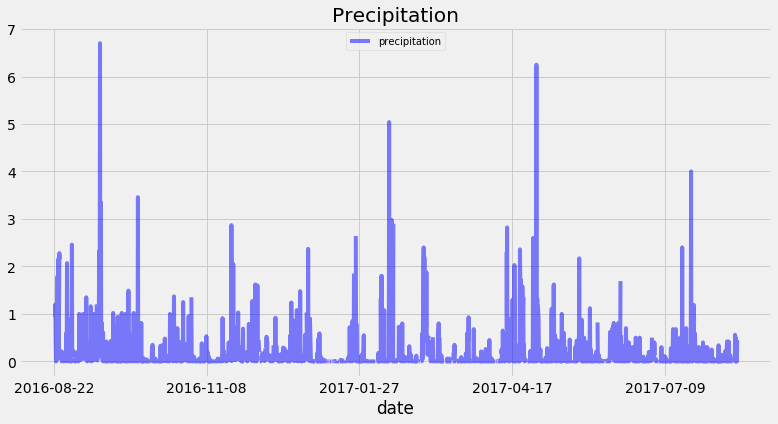

In [27]:
# Use Pandas Plotting with Matplotlib to plot the data

final_scores = scores_df.drop(columns=['station'])
final_scores.plot(title="Precipitation", color='blue', alpha=0.5, figsize=(12,6))
plt.legend(loc='upper center', prop={'size': 10})
plt.savefig("Precipitation.png")
plt.show()


In [28]:
# Use Pandas to calcualte the summary statistics for the precipitation data


mean = final_scores['precipitation'].mean()
median = final_scores['precipitation'].median()
mode = final_scores['precipitation'].mode()

print(f"The mean Precipitation is {mean}")
print(f"The median Precipitation is{median}")
print(f"The mode Precipitation is {mode}")

The mean Precipitation is 0.17943731490621848
The median Precipitation is0.02
The mode Precipitation is 0    0.0
dtype: float64


In [29]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station.id).count()
station_count

9

In [44]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_active = session.query(Measurement.station, 
                                func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [69]:
#Calling out Most Active Stations by index, not by name due for future updates
most_active_station=station_active[0][0]
most_active_station


'USC00519281'

In [94]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
#Isolating the most active station data to sort descending to pull the 
most_active_info=session.query(Measurement.station,Measurement.date,Measurement.tobs).filter(Measurement.station== most_active_station).order_by(Measurement.tobs).all()
most_active_info

[('USC00519281', '2013-01-16', 54.0),
 ('USC00519281', '2015-01-05', 56.0),
 ('USC00519281', '2015-02-15', 56.0),
 ('USC00519281', '2015-03-13', 56.0),
 ('USC00519281', '2016-02-08', 56.0),
 ('USC00519281', '2011-01-11', 57.0),
 ('USC00519281', '2014-03-04', 57.0),
 ('USC00519281', '2015-03-09', 57.0),
 ('USC00519281', '2015-03-10', 57.0),
 ('USC00519281', '2015-03-17', 57.0),
 ('USC00519281', '2016-02-09', 57.0),
 ('USC00519281', '2010-12-07', 58.0),
 ('USC00519281', '2014-01-23', 58.0),
 ('USC00519281', '2014-01-24', 58.0),
 ('USC00519281', '2015-01-13', 58.0),
 ('USC00519281', '2015-02-06', 58.0),
 ('USC00519281', '2016-02-10', 58.0),
 ('USC00519281', '2013-01-18', 59.0),
 ('USC00519281', '2014-12-31', 59.0),
 ('USC00519281', '2017-02-02', 59.0),
 ('USC00519281', '2017-02-08', 59.0),
 ('USC00519281', '2017-02-09', 59.0),
 ('USC00519281', '2010-01-12', 60.0),
 ('USC00519281', '2010-01-22', 60.0),
 ('USC00519281', '2010-12-08', 60.0),
 ('USC00519281', '2011-01-09', 60.0),
 ('USC005192

In [108]:
most_active_info_df = pd.DataFrame(most_active_info, columns=['Station','Date','TOBS'])
min_most_active_temp = most_active_info_df['TOBS'].min()
max_most_active_temp = most_active_info_df['TOBS'].max()
avg_most_active_temp = most_active_info_df['TOBS'].mean()
print (f"The most active station's lowest temperature: {min_most_active_temp}")
print (f"The most active station's highest temperature: {max_most_active_temp}")
print (f"The most active station's average temperature: {max_most_active_temp}")

The most active station's lowest temperature: 54.0
The most active station's highest temperature: 85.0
The most active station's average temperature: 85.0


In [ ]:
#most_active_station=len(station_active)-[0][]

In [113]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_active_yr=session.query(Measurement.station,Measurement.date,Measurement.tobs).filter(Measurement.station== most_active_station).filter(Measurement.date >= query_date).order_by(Measurement.tobs).all()
most_active_yr


[('USC00519281', '2017-02-02', 59.0),
 ('USC00519281', '2017-02-08', 59.0),
 ('USC00519281', '2017-02-09', 59.0),
 ('USC00519281', '2017-02-03', 60.0),
 ('USC00519281', '2017-04-30', 60.0),
 ('USC00519281', '2017-02-25', 61.0),
 ('USC00519281', '2016-12-15', 62.0),
 ('USC00519281', '2017-01-06', 62.0),
 ('USC00519281', '2017-01-09', 62.0),
 ('USC00519281', '2017-01-10', 62.0),
 ('USC00519281', '2017-02-10', 62.0),
 ('USC00519281', '2017-03-07', 62.0),
 ('USC00519281', '2016-11-07', 63.0),
 ('USC00519281', '2017-01-04', 63.0),
 ('USC00519281', '2017-01-05', 63.0),
 ('USC00519281', '2017-01-11', 63.0),
 ('USC00519281', '2017-01-03', 64.0),
 ('USC00519281', '2017-02-07', 64.0),
 ('USC00519281', '2017-03-08', 64.0),
 ('USC00519281', '2016-12-13', 65.0),
 ('USC00519281', '2017-01-12', 65.0),
 ('USC00519281', '2017-01-28', 65.0),
 ('USC00519281', '2017-02-16', 65.0),
 ('USC00519281', '2017-02-27', 65.0),
 ('USC00519281', '2017-03-18', 65.0),
 ('USC00519281', '2017-05-01', 65.0),
 ('USC005192

In [118]:
most_active_yr_df = pd.DataFrame(most_active_yr, columns=['Station','Date','Temperature'])
most_active_yr_df = most_active_yr_df.sort_values(by='Date',ascending=True)
most_active_yr_df

,Station,Date,Temperature
293,USC00519281,2016-08-22,78.0
262,USC00519281,2016-08-23,77.0
263,USC00519281,2016-08-24,77.0
334,USC00519281,2016-08-25,80.0
335,USC00519281,2016-08-26,80.0
...,...,...,...
291,USC00519281,2017-08-14,77.0
292,USC00519281,2017-08-15,77.0
260,USC00519281,2017-08-16,76.0
261,USC00519281,2017-08-17,76.0


In [120]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.hist(most_active_yr['Temperature'])
plt.xlabel('Temperature')
plt.ylabel('Date')
plt.show()


TypeError: list indices must be integers or slices, not str

In [121]:
most_active_yr_df.dtypes

Station         object
Date            object
Temperature    float64
dtype: object

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
